## 4th Iteration - Add 4 new features

In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the libraries to handle the np array, pandas dataframe, and visualiztion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import py file
import prepare

# Import libaries to monitor the process and time
import psutil
from tqdm import tqdm

In [2]:
%%time

# Import the train, validate, and test dataset of 2000 users
df_train = pd.read_csv("data_2000users/train.csv")
df_validate = pd.read_csv("data_2000users/validate.csv")
df_test = pd.read_csv("data_2000users/test.csv")

# Print the memory use
print("Momery usage after import train/validate/test files: ", psutil.virtual_memory().percent)

# Read the questions.csv
df_ques = pd.read_csv("questions_with_tag_counts.csv", index_col=0)

# Print the memory use
print("Momoery usage after import other file: ", psutil.virtual_memory().percent)

# Print the number of rows and columns in all datasets
print("(# rows, # cols) of train: ", df_train.shape)
print("(# rows, # cols) of validate: ", df_validate.shape)
print("(# rows, # cols) of test: ", df_test.shape)
print("(# rows, # cols) of question_with_tag_counts.csv: ", df_ques.shape)

Momery usage after import train/validate/test files:  68.3
Momoery usage after import other file:  68.3
(# rows, # cols) of train:  (411517, 18)
(# rows, # cols) of validate:  (50842, 18)
(# rows, # cols) of test:  (52868, 18)
(# rows, # cols) of question_with_tag_counts.csv:  (13523, 6)
CPU times: user 524 ms, sys: 113 ms, total: 637 ms
Wall time: 642 ms


In [3]:
%%time

# Import the dataframe of new features
bundle_stats = pd.read_csv("data_2000users/bundle_stats.csv", index_col=0)
part_stats = pd.read_csv("data_2000users/part_stats.csv", index_col=0)
tag_stats = pd.read_csv("data_2000users/tag_stats.csv", index_col=0)
tagcount_stats = pd.read_csv("data_2000users/tagcount_stats.csv", index_col=0)

# Print the memory use
print("Momery usage after import train/validate/test files: ", psutil.virtual_memory().percent)

# Print the number of rows and columns in all datasets
print("(# rows, # cols): ", bundle_stats.shape)
print("(# rows, # cols): ", part_stats.shape)
print("(# rows, # cols): ",tag_stats.shape)
print("(# rows, # cols): ", tagcount_stats.shape)

Momery usage after import train/validate/test files:  67.7
(# rows, # cols):  (9134, 5)
(# rows, # cols):  (7, 5)
(# rows, # cols):  (1485, 5)
(# rows, # cols):  (6, 5)
CPU times: user 18.7 ms, sys: 6.42 ms, total: 25.1 ms
Wall time: 25.9 ms


### Generate train/validate/test and the scald train/validate/test

In [4]:
%%time

train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

# Print the shapes of the scaled train/validate/test
print("(# rows, # cols) of scaled train: ", train_s.shape)
print("(# rows, # cols) of scaled validate: ", validate_s.shape)
print("(# rows, # cols) of scaled test: ", test_s.shape)

(# rows, # cols) of scaled train:  (403377, 8)
(# rows, # cols) of scaled validate:  (49945, 8)
(# rows, # cols) of scaled test:  (51971, 8)
CPU times: user 8.75 s, sys: 445 ms, total: 9.2 s
Wall time: 9.16 s


In [5]:
# Take a peek at the train_s
train_s.head()

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202
2,4094,1,0,0.630049,0.444444,0.445216,0.0,0.001202
3,9699,1,0,0.630049,0.406250,0.544008,0.0,0.001202
4,5889,0,0,0.630049,0.687500,0.485282,0.0,0.001202


In [6]:
# Take a peek at the validate_s
validate_s.head()

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,3209,1,1,0.630049,0.604167,0.478261,0.0,0.001202
1,3208,1,1,0.630049,0.708333,0.478261,0.0,0.001202
2,3207,1,1,0.630049,0.687500,0.478261,0.0,0.001202
3,3076,1,1,0.630049,0.735294,0.619048,0.0,0.001202
4,3075,1,1,0.630049,0.852941,0.619048,0.0,0.001202


In [7]:
# Take a peek at the scaled test dataset
test_s.head()

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,8811,1,1,0.630049,0.468750,0.529412,0.0,0.001202
1,8643,1,1,0.630049,0.290323,0.578947,0.0,0.001202
2,8609,0,1,0.630049,0.387755,0.588235,0.0,0.001202
3,6183,1,1,0.630049,0.740741,0.714286,0.0,0.001202
4,8393,0,1,0.630049,0.428571,0.687500,0.0,0.001202


### Merge with Four New Features

In [8]:
# Concat with df_ques

scaled_train = train_s.merge(df_ques, how='left', left_on='content_id', right_on='question_id')
scaled_validate = validate_s.merge(df_ques, how='left', left_on='content_id', right_on='question_id')
scaled_test = test_s.merge(df_ques, how='left', left_on='content_id', right_on='question_id')

# Print the first 2 rows in scaled train after merging with df_ques
scaled_train.head(2)

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,question_id,bundle_id,correct_answer,part,tags,tag_count
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202,5720,5720,1,5,115,1
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202,5204,5204,3,5,173,1


In [9]:
# Merge with bundle accuracy

scaled_train = scaled_train.merge(bundle_stats[['mean_bundle_accuracy']], how='left', on='bundle_id')
scaled_validate = scaled_validate.merge(bundle_stats[['mean_bundle_accuracy']], how='left', on='bundle_id')
scaled_test = scaled_test.merge(bundle_stats[['mean_bundle_accuracy']], how='left', on='bundle_id')

scaled_train.head(2)

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,question_id,bundle_id,correct_answer,part,tags,tag_count,mean_bundle_accuracy
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202,5720,5720,1,5,115,1,0.818182
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202,5204,5204,3,5,173,1,0.550000


In [10]:
# Merge with part accuracy

scaled_train = scaled_train.merge(part_stats[['mean_part_accuracy']], how='left', on='part')
scaled_validate = scaled_validate.merge(part_stats[['mean_part_accuracy']], how='left', on='part')
scaled_test = scaled_test.merge(part_stats[['mean_part_accuracy']], how='left', on='part')

# Print the first 2 rows of scaled train
scaled_train.head(2)

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,question_id,bundle_id,correct_answer,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202,5720,5720,1,5,115,1,0.818182,0.610488
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202,5204,5204,3,5,173,1,0.550000,0.610488


In [11]:
# Merge with tag accuracy

scaled_train = scaled_train.merge(tag_stats[['mean_tags_accuracy']], how='left', on='tags')
scaled_validate = scaled_validate.merge(tag_stats[['mean_tags_accuracy']], how='left', on='tags')
scaled_test = scaled_test.merge(tag_stats[['mean_tags_accuracy']], how='left', on='tags')

# Print the first 2 rows of scaled train
scaled_train.head(2)

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,question_id,bundle_id,correct_answer,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_tags_accuracy
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202,5720,5720,1,5,115,1,0.818182,0.610488,0.791067
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202,5204,5204,3,5,173,1,0.550000,0.610488,0.650256


In [13]:
# Merge with tagcount accuracy

scaled_train = scaled_train.merge(tagcount_stats[['mean_tagcount_accuracy']], how='left', on='tag_count')
scaled_validate = scaled_validate.merge(tagcount_stats[['mean_tagcount_accuracy']], how='left', on='tag_count')
scaled_test = scaled_test.merge(tagcount_stats[['mean_tagcount_accuracy']], how='left', on='tag_count')

# Print the first 2 rows of scaled train
scaled_train.head(2)

,content_id,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,question_id,bundle_id,correct_answer,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_tags_accuracy,mean_tagcount_accuracy
0,5720,1,0,0.630049,0.818182,0.682248,0.0,0.001202,5720,5720,1,5,115,1,0.818182,0.610488,0.791067,0.615325
1,5204,0,0,0.630049,0.550000,0.534988,0.0,0.001202,5204,5204,3,5,173,1,0.550000,0.610488,0.650256,0.615325


### Drop the object columns

In [15]:
# Create the list of columns that need to be dropped
cols = ['content_id','question_id','bundle_id','correct_answer','part','tags','tag_count']

# Drop the object columns
scaled_train.drop(columns=cols, inplace=True)
scaled_validate.drop(columns=cols, inplace=True)
scaled_test.drop(columns=cols, inplace=True)

# Print the first 2 rows of scaled train
scaled_train.head(2)

,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled,mean_bundle_accuracy,mean_part_accuracy,mean_tags_accuracy,mean_tagcount_accuracy
0,1,0,0.630049,0.818182,0.682248,0.0,0.001202,0.818182,0.610488,0.791067,0.615325
1,0,0,0.630049,0.550000,0.534988,0.0,0.001202,0.550000,0.610488,0.650256,0.615325


### Fill the nulls with 0.5

In [35]:
scaled_validate.fillna(0.5, inplace=True)
scaled_test.fillna(0.5, inplace=True)

scaled_test.isnull().sum(axis=0)

answered_correctly                    0
question_had_explanation              0
user_acc_mean                         0
mean_content_accuracy                 0
mean_task_accuracy                    0
user_lectures_running_total_scaled    0
avg_user_q_time_scaled                0
mean_bundle_accuracy                  0
mean_part_accuracy                    0
mean_tags_accuracy                    0
mean_tagcount_accuracy                0
dtype: int64

### Seperate the features and target

In [36]:
X_train = scaled_train.drop(columns='answered_correctly')
y_train = scaled_train['answered_correctly']

X_validate = scaled_validate.drop(columns='answered_correctly')
y_validate = scaled_validate['answered_correctly']

X_test = scaled_test.drop(columns='answered_correctly')
y_test = scaled_test['answered_correctly']

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

# Set up the number of features I want to pick
n_features = 5

# parameters: f_regression stats test, give me 5 features
f_selector = SelectKBest(f_regression, k=n_features)

# find the top 4 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# Put the features in a dataframe
df_features = pd.DataFrame({'Features': f_feature, 
                            'Rank': range(1, n_features+1)})

# Print out the dataframe
df_features

,Features,Rank
0,user_acc_mean,1
1,mean_content_accuracy,2
2,mean_task_accuracy,3
3,mean_bundle_accuracy,4
4,mean_tags_accuracy,5


### Modeling - Compute the baseline

In [38]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [39]:
# Create the y_predicted on y_train

size = y_train.size
y_baseline = np.random.randint(2, size=size)
roc_auc_score(y_train, y_baseline)

0.501261822494722

In [40]:
### Use the most frequent calss as the baseline

y_train.value_counts(normalize=True)
y_baseline2 = np.array([1]*size)
roc_auc_score(y_train, y_baseline2)

0.5

### LightGBM

[LightGBM] [Info] Number of positive: 262571, number of negative: 140806
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1786
[LightGBM] [Info] Number of data points in the train set: 403377, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650932 -> initscore=0.623138
[LightGBM] [Info] Start training from score 0.623138
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.58666
0.7026535195983319


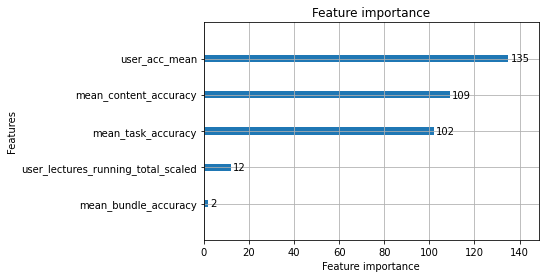

In [41]:
import lightgbm as lgb

# Create the LightGBM data containers
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=[0])
test_data = lgb.Dataset(X_validate, label=y_validate)

parameters = {
    'application': 'binary'
}

# Model on 
model = lgb.train(parameters,
                  train_data,
                  valid_sets=test_data,
                  verbose_eval=100,
                  num_boost_round=10000,
                  early_stopping_rounds=10)

y = model.predict(X_validate)

print(roc_auc_score(y_validate, y))
lgb.plot_importance(model)
plt.show()

[LightGBM] [Info] Number of positive: 262571, number of negative: 140806
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1786
[LightGBM] [Info] Number of data points in the train set: 403377, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650932 -> initscore=0.623138
[LightGBM] [Info] Start training from score 0.623138
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.601475
auc: 0.6918130334854984


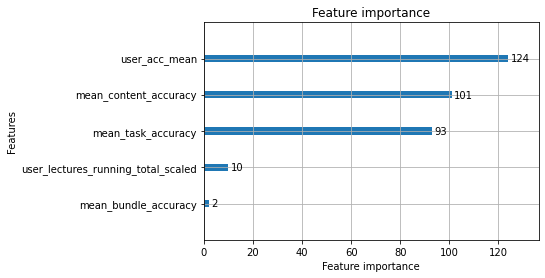

In [43]:
# categorical_features = ['question_had_explanation']
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=[0])
test_data = lgb.Dataset(X_test, label=y_test)

model = lgb.train(
    {'objective': 'binary'},
    train_data,
    valid_sets=test_data,
    verbose_eval=100,
    num_boost_round=10000,
    early_stopping_rounds=10
)

print('auc:', roc_auc_score(y_test, model.predict(X_test)))
_ = lgb.plot_importance(model)

### Modeling on various classificaiton algorithms

In [44]:
# Import algorithms for the binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import model

In [45]:
# Create a list of names of the classifiers

names = ['LogisticRegression',
         'Decision Tree (max=3)',
         'Decision Tree (max=5)',
         'Random Forest (max=3)',
         'Ada Boost',
         'Gradient Boost',
         'Nearest Neighbors (n=3)',
         'Nearest Neighbors (n=5)',
         'Naive Bayes',
         'Neural Net'
        ]

In [46]:
# Create a list of classifiers

classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth=3),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=3),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier(3),
               KNeighborsClassifier(5),
               GaussianNB(), 
               MLPClassifier()
              ]

In [47]:
# The size between the two should be the same
len(names) == len(classifiers)

True

In [48]:
metrics = model.model_multiple_algos(names, classifiers, 
                                     X_train, y_train, 
                                     X_validate, y_validate, 
                                     X_test, y_test)

Currently running on model LogisticRegression
LogisticRegression has completed
Currently running on model Decision Tree (max=3)
Decision Tree (max=3) has completed
Currently running on model Decision Tree (max=5)
Decision Tree (max=5) has completed
Currently running on model Random Forest (max=3)
Random Forest (max=3) has completed
Currently running on model Ada Boost
Ada Boost has completed
Currently running on model Gradient Boost
Gradient Boost has completed
Currently running on model Nearest Neighbors (n=3)
Nearest Neighbors (n=3) has completed
Currently running on model Nearest Neighbors (n=5)
Nearest Neighbors (n=5) has completed
Currently running on model Naive Bayes
Naive Bayes has completed
Currently running on model Neural Net
Neural Net has completed


In [51]:
# Only show test results

mask = metrics.dataset == "test"
metrics[mask].sort_values("AUC score", ascending=False)

,AUC score,Algo,dataset
2,0.690927,LogisticRegression,test
29,0.687113,Neural Net,test
17,0.685712,Gradient Boost,test
11,0.684870,Random Forest (max=3),test
8,0.682569,Decision Tree (max=5),test
14,0.676861,Ada Boost,test
5,0.675218,Decision Tree (max=3),test
26,0.674767,Naive Bayes,test
23,0.645182,Nearest Neighbors (n=5),test
20,0.626631,Nearest Neighbors (n=3),test


**Quick note: so far the highest score on test is Logistic Regression.**

In [ ]:
# Plot the AUC-ROC curve on test
auc_curve_plot1(lr, "Logistic Regression on test", X_test, y_test)

### Conclusion and Future Work

**Conclusion**<br>
The conclusion will be the combination of the takeaways from each section. Please write the takeaways from the section you have been working on so we can combine them later on.

**Future Work**

1. Split the dataset in the group shuffle way and construct the model on that.
2. Create more visualizations and match the visuals with the hypothesis we come up with.
3. Form an amazing story to tell our potential employers.
4. Research the advanced algorithms to improve auc score and create more robust features for modeling (e.g. harmonic mean).